In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

C:\Users\ekim298\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip install ISLP

Defaulting to user installation because normal site-packages is not writeable


# 1 Question 1 (23 points)
1.1 Replicating the Regression Table (9 points)

Using the Advertising dataset from the ISLP library and the linear regression to model the relationship between sales and the three predictors: TV, radio, and newspaper, replicate the regression table similar to the one provided above.

In [5]:
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_row', 10)
pd.set_option('display.width', None)

# deprecated features/outdated, potential code inefficiencies, or resource warnings
import warnings
warnings.filterwarnings("ignore")

import ISLP 
# df = ISLP.load_data('Advertising.csv')
# print(df.head(2))

# Load data: Advertising
# 3
df = pd.read_csv('Advertising.csv')
print(df.head(2))
print(df.columns)

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [6]:
# regression table
# outcome: sales, predictors: TV, radio, newspaper
y = df['sales']
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
                  'TV': df['TV'], 'radio': df['radio'], 'newspaper': df['newspaper']})
X[:5]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        15:55:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9389      0.312      9.422      0.0

1.2 Hypotheses for the p-values (7 points)\
• Question: For each predictor (TV, radio, and newspaper), describe the null hypothesis
that corresponds to the p-values given in the regression table.\
• Explain what the null hypothesis means in the context of the data, not just in terms
of the coefficients.

• Answer: Assume that your model is
$$Sales = \beta_0+\beta_{TV} TV + \beta_{radio} radio + \beta_{newspaper} newspaper.$$

Corresponding null hypontheses are\ 
$$\beta_{TV} = 0,$$
$$\beta_{radio} = 0,$$
$$\beta_{newspaper} = 0, $$
respectively.

These nully hypothesis means the relevant predictor does not have any impact on the outcome variable, sales. In other words, under the null hyponthesis, chaning a predictor is not expected to change the outcome variable, with all other predictors remains the same. 


1.3 Interpreting the Results (7 points)\
• Question: Based on the p-values from the regression output, explain what conclusions
you can draw about the relationship between sales and the predictors (TV, radio,
newspaper).

• Answer: Based on the p-values, I can conclude that all the predectors except newspaper affects the outcome variable, sales. This is because the p-values for TV and radio are less than $0.0001$ (meaning the estimated coefficient is likely to happen with probability<0.01%) which implies I can reject the respective null hypothesis, $\beta_{TV}=0$ and $\beta_{radio}=0$. \
However, as the p-value of the coefficient of the newspaper is $0.8599$ which is too high, so that we cannot reject the null hyponthesis, $\beta_{newspaper}=0$.

# 2 Question 2 (10 point)
• Question: Explain the concepts of the K-Nearest Neighbors (KNN) Classifier and K-Nearest Neighbors
(KNN) Regression methods. Discuss how each method works and their differences.

• Answer: 

KNN classifier.\
Assume that the classification task given is to classify observations into binary outcomes, say $\{0,1\}$. KNN classifier is a classification method that classifies a new observation based on the nearest $K$ points of the training set. The classificaiton result on the new observation is done by "voting" of these nearest $K$ points. For example, let there are $K_1$ points with outcome class $0$ and $K_2$ points with outcome class $1$, where $K_1+K_2 = K$. Then, the probability of the new observation is classified as $0$ equals $K_1/(K_1+K_2)$. Even if there are more than two classes, this method can be generalized analogeously. The classificaiton result is determined by a predetermined probability threshold, which is usually $0.5$.

KNN regression.\
KNN regression method is a non-parametric regression method. Let $x_0$ be a new observation point, for which I want to predict the outcome variable, $y:=f(x_0)$. Given a value $K$, the method first identifies the K training observations that are closest to $x_0$ based on predetermined metric on the predictor space. Denote by $\mathcal N_0$ the K training observations chosen. Then, the estimates for $f(x_0)$ is calculated by $$\hat{f}(x_0)=\frac1K\sum_{x_i\in \mathcal N_0} y_i.$$ According to the settings, this average can be a weighted average with weight being greater for closer points. 

Differences.\
Although two methods use similar framework with assumptions that vicinity of the predictors would guarantee the similarity of the outcome variable, there are several differences. 

First, KNN classifier is used for classification problems, meaning that the outcome classes are discrete and maybe not ordinal. However, KNN regression method is used when the outcome variable is continuous and ordinal. 

Second, the decision is done by 'voting' in KNN classifies, whereas the decision is done by 'averaring' the outcomes of the neighbors. 

# 3 Question 3 (20 points)
I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression.

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 +β1X +ϵ.
Consider the training residual sum of squares (RSS) for the linear regression, and also
the training RSS for the cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not enough information to
tell? Justify your answer. (5 points)

• Answer: RSS for the cubic regression is expected to be lower. This is because the cubic regression model is more flexible, possibly capturing the random noise. As RSS measures the model fit to the data, RSS decreases as more terms are included in the model. While the linear model fits the data based on the true linear relationship, the cubic model uses its additional flexibility to better match the individual data points (including random noise), resulting in a lower training RSS. However, this does not mean the cubic model is better overall; it just fits the training data more tightly, which often leads to overfitting and poorer performance on unseen test data.


(b) Answer (a) using test rather than training RSS (Note: The term 'test’ refers to the
test data). (5 points)

• Answer: As seen in below result, RSS for test data is smaller for the cubic model.

               Model  Training RSS   Test RSS
0  Linear Regression     62.738704  18.928487
1   Cubic Regression     60.859754  17.498131


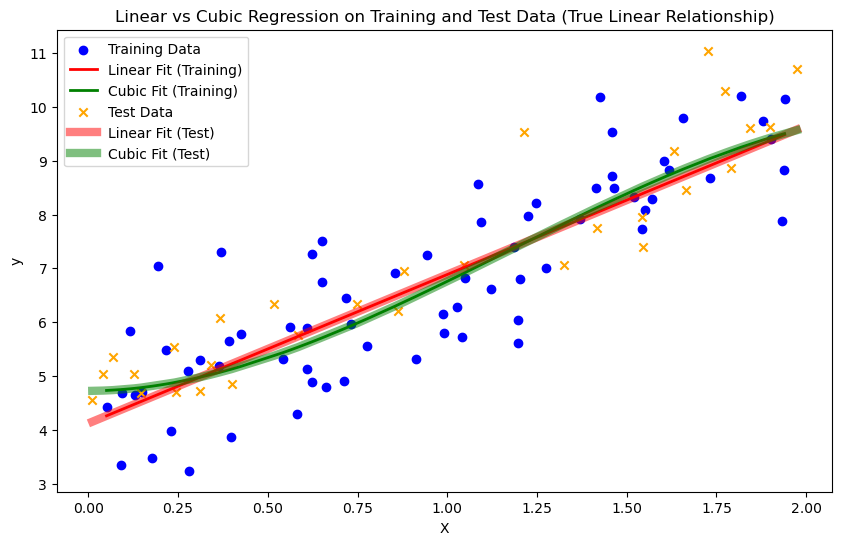

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data where the true relationship is linear
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # True model: y = 4 + 3X + noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train_lin = lin_reg.predict(X_train)
y_pred_test_lin = lin_reg.predict(X_test)

# Polynomial (cubic) regression
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)
y_pred_train_poly = lin_reg_poly.predict(X_train_poly)
y_pred_test_poly = lin_reg_poly.predict(X_test_poly)

# Calculate the training and test RSS for both models
train_rss_lin = mean_squared_error(y_train, y_pred_train_lin) * len(y_train)
test_rss_lin = mean_squared_error(y_test, y_pred_test_lin) * len(y_test)

train_rss_poly = mean_squared_error(y_train, y_pred_train_poly) * len(y_train)
test_rss_poly = mean_squared_error(y_test, y_pred_test_poly) * len(y_test)

# Output the results for the linear vs cubic on linear data
results_linear = {
    "Model": ["Linear Regression", "Cubic Regression"],
    "Training RSS": [train_rss_lin, train_rss_poly],
    "Test RSS": [test_rss_lin, test_rss_poly]
}

results_linear_df = pd.DataFrame(results_linear)
print(results_linear_df)
# Plot results with test set and test predictions
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(np.sort(X_train, axis=0), np.sort(y_pred_train_lin, axis=0), color="red", label="Linear Fit (Training)", linewidth=2)
plt.plot(np.sort(X_train, axis=0), np.sort(lin_reg_poly.predict(X_train_poly), axis=0), color="green", label="Cubic Fit (Training)", linewidth=2)

# Plot test data
plt.scatter(X_test, y_test, color="orange", label="Test Data", marker='x')
plt.plot(np.sort(X_test, axis=0), np.sort(y_pred_test_lin, axis=0), color="red", label="Linear Fit (Test)",  linewidth=6, alpha=0.5)
plt.plot(np.sort(X_test, axis=0), np.sort(lin_reg_poly.predict(X_test_poly), axis=0), color="green", label="Cubic Fit (Test)", linewidth=6, alpha=0.5)

# Add legend and labels
plt.legend()
plt.title("Linear vs Cubic Regression on Training and Test Data (True Linear Relationship)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


(c) Suppose that the true relationship between X and Y is not linear, but we don’t
know how far it is from linear. Consider the training RSS for the linear regression,
and also the training RSS for the cubic regression. Would we expect one to be
lower than the other, would we expect them to be the same, or is there not enough
information to tell? Justify your answer. (5 points)

• Answer: The training RSS for the cubic regression is expected to be lower, due to the cubic model's additional flexfibility. As the cubic model includes the linear term, X, training RSS is expected to be smaller for the cubic model, regardless of the true model. 

(d) Answer (c) using test rather than training RSS. (5 points)
• Answer: As seen in the results below, test RSS is lower for the cubic model again.

               Model  Training RSS   Test RSS
0  Linear Regression     66.468998  22.896743
1   Cubic Regression     60.859754  17.498131


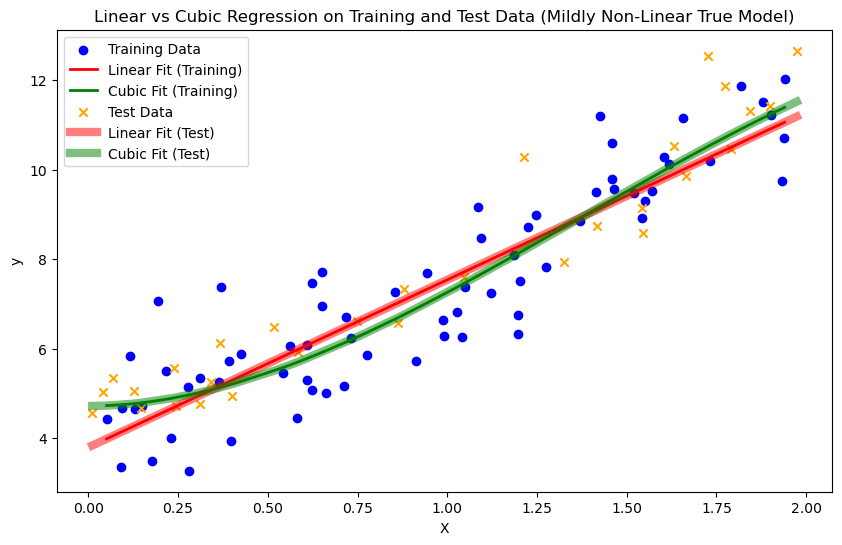

In [33]:
# Generate synthetic data (mildly non-linear relationship)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 0.5 * X**2 + np.random.randn(100, 1)  # Mildly non-linear relationship with noise

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin = lin_reg.predict(X_test)

# Cubic regression model (polynomial of degree 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)

# Compute RSS (Residual Sum of Squares)
train_rss_lin = mean_squared_error(y_train, y_train_pred_lin) * len(y_train)
test_rss_lin = mean_squared_error(y_test, y_test_pred_lin) * len(y_test)

train_rss_poly = mean_squared_error(y_train, y_train_pred_poly) * len(y_train)
test_rss_poly = mean_squared_error(y_test, y_test_pred_poly) * len(y_test)

# Output the results
results = {
    "Model": ["Linear Regression", "Cubic Regression"],
    "Training RSS": [train_rss_lin, train_rss_poly],
    "Test RSS": [test_rss_lin, test_rss_poly]
}
print(pd.DataFrame(results))

results_df = pd.DataFrame(results)


# Plot results with test set and test predictions for the mildly non-linear true model
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(np.sort(X_train, axis=0), np.sort(y_train_pred_lin, axis=0), color="red", label="Linear Fit (Training)", linewidth=2)
plt.plot(np.sort(X_train, axis=0), np.sort(poly_reg.predict(poly.transform(X_train)), axis=0), color="green", label="Cubic Fit (Training)", linewidth=2)

# Plot test data
plt.scatter(X_test, y_test, color="orange", label="Test Data", marker='x')
plt.plot(np.sort(X_test, axis=0), np.sort(y_test_pred_lin, axis=0), color="red", label="Linear Fit (Test)", linewidth=6, alpha=0.5)
plt.plot(np.sort(X_test, axis=0), np.sort(poly_reg.predict(poly.transform(X_test)), axis=0), color="green", label="Cubic Fit (Test)", linewidth=6, alpha=0.5)

# Add legend and labels
plt.legend()
plt.title("Linear vs Cubic Regression on Training and Test Data (Mildly Non-Linear True Model)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


# 4 Question 4 (22 points)

In this problem, we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [35]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
print(x[:5])
print(y[:5])

[ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587]
[ 0.03988737  2.50568108  0.53528207 -1.93716122  3.02955534]


(a) Perform a simple linear regression of y onto x, without an intercept. Report the
coefficient estimate $\hat\beta$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : $\beta$ = 0. Comment on these
results. (You can perform regression without an intercept using the keywords argument
intercept=False to ModelSpec()). (4 points)

In [36]:
model = sm.OLS(y, X)
results = model.fit(intercept=False)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.009
Method:                 Least Squares   F-statistic:                             0.1113
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                       0.739
Time:                        17:14:01   Log-Likelihood:                         -209.14
No. Observations:                 100   AIC:                                      420.3
Df Residuals:                      99   BIC:                                      422.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

4(a) We have the following results. 

coefficient estimate = 0.0591

t-statistic = 0.334

p-value = 0.739

The null hyponthesis cannot be rejected, as t-statistics is too small, or the p-value is too large > 0.05. That is, it is not possible to conclude that the coefficient is different from zero with statistical significance of 5% level.

(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results. (4 points)

In [37]:
model = sm.OLS(X, y)
results = model.fit(intercept=False)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.009
Method:                 Least Squares   F-statistic:                             0.1113
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                       0.739
Time:                        17:19:13   Log-Likelihood:                         -152.38
No. Observations:                 100   AIC:                                      306.8
Df Residuals:                      99   BIC:                                      309.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

4(b) The regression result has the coefficient estimate 0.0190, standard error 0.057, along with the same t-statistic and p-value as in the previous regression. Likewise, null hyponthesis cannot be rejected, as t-statistic is not large enough (threshold is 1.96 for 5% confidence level, for example) and p-value is too large (it should be smaller than 0.05 for 5% confidence level, for example). 

4(c) What is the relationship between the results obtained in (a) and (b)? (3 points)

Here, t-statistics and the p-value are the same as in the previous regression, because of th esymmetric nature of the correlation in simple linear regression. Both regressions measure the strength of the linear relationship betwee X and y and the test statistics for the slope depend only on the correlation between the two variables. Thus, it is obvious to have the same t-statistics and the p-values. 

4(d) We have $$\hat\beta = \left(\sum_{i=1}^n x_iy_i\right)/\left(\sum_{i^\prime =1}^n x_{i^\prime}^2\right)$$ and $$SE(\hat\beta) = \sqrt{\frac{\sum_{i=1}^n(y_i-x_i\hat\beta)^2}{(n-1)\sum_{i^\prime =1}^n x_{i^\prime}^2}}$$

Note that 

\begin{align*}
\sum_{i=1}^n (y_i-x_i\hat\beta)^2 &= \sum_{i=1}^n \left(y_i-x_i\frac{\sum_{i=1}^n x_iy_i}{\sum_{i^\prime =1}^n x_{i^\prime}^2}\right)^2\\
&= \sum_{i=1}^n y_i^2 - 2\sum_{i=1}^n x_iy_i \frac{\sum_{i=1}^n x_iy_i}{\sum_{i^\prime =1}^n x_{i^\prime}^2} + \sum_{i=1}^n x_i^2 \left(\frac{\sum_{i=1}^n x_iy_i}{\sum_{i^\prime =1}^n x_{i^\prime}^2}\right)^2\\
&=\sum_{i=1}^n y_i^2  - \sum_{i=1}^n x_iy_i \frac{\sum_{i=1}^n x_iy_i}{\sum_{i^\prime =1}^n x_{i^\prime}^2},
\end{align*}
so that 
\begin{align*}
&\sum_{j=1}^n x_j^2 \sum_{i=1}^n (y_i-x_i\hat\beta)^2\\
=&\sum_{j=1}^n x_j^2 \sum_{i=1}^n y_i^2 - (\sum_{i=1}^n x_iy_i )^2.
\end{align*}

Thus, 
\begin{align*}
\hat\beta / SE(\hat\beta) &= \frac{\sum_{i=1}^n x_iy_i}{\sum_{i^\prime =1}^n x_{i^\prime}^2}\sqrt{\frac{(n-1)\sum_{i^\prime =1}^n x_{i^\prime}^2}{\sum_{i=1}^n(y_i-x_i\hat\beta)^2}}\\
&=\frac{\sqrt{n-1}\sum_{i=1}^n x_iy_i}{\sum_{j=1}^n x_j^2 \sum_{i=1}^n y_i^2-(\sum_{i=1}^n x_iy_i )^2}.
\end{align*}

4(e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y. (3 points)

As the expression for the t-statistics is symmetric in $x$ and $y$, t-statistics for the regression of $y$ on $x$ is the same as that for the regression of $x$ on $y$.

4 (f) In Python, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y. (4 points)

As seen in below, the t-statistics and p-values are the same in two regressions.

In [42]:
import statsmodels.api as sm

# Add a column of ones to X to include the intercept
X_with_intercept = sm.add_constant(X)

# Run the regression with the intercept
model1 = sm.OLS(y, X_with_intercept)
results1 = model1.fit()

# Print the summary
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.177
Date:                Sat, 28 Sep 2024   Prob (F-statistic):             0.0146
Time:                        17:58:00   Log-Likelihood:                -205.50
No. Observations:                 100   AIC:                             415.0
Df Residuals:                      98   BIC:                             420.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9743      0.358     -2.720      0.0

In [43]:
# Add a column of ones to y to include the intercept
y_with_intercept = sm.add_constant(y)

# Run the regression of X on y (with intercept)
model2 = sm.OLS(X, y_with_intercept)
results2 = model2.fit()

# Print the summary
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.177
Date:                Sat, 28 Sep 2024   Prob (F-statistic):             0.0146
Time:                        17:58:35   Log-Likelihood:                -86.412
No. Observations:                 100   AIC:                             176.8
Df Residuals:                      98   BIC:                             182.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9567      0.058     16.390      0.0